<a href="https://colab.research.google.com/github/onurburakozdemir/FIZ437E/blob/main/HW1_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from numpy import pi

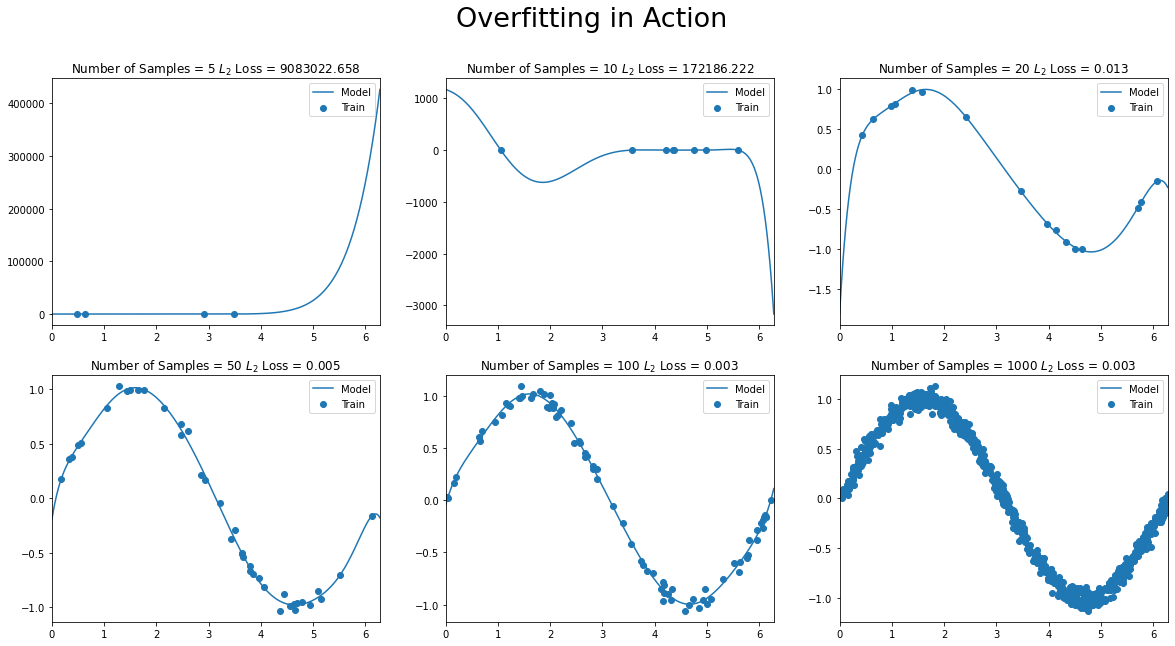

In [ ]:
#parameters
mean, std, test_size = 0, 0.05, 0.2
degree = 10
n = [5, 10, 20, 50, 100, 1000] 

#dummy index for plot stuff
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(20, 10))
j = [ax1,ax2,ax3,ax4,ax5,ax6] 
k = 0


for i in n:
  x = 2*pi*np.random.rand(i, 1) 
  y = np.sin(x) + np.random.normal(mean, std, size=(i, 1)) 
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=0) 
  
  #make model and fit
  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())  

  model.fit(X_train, Y_train)  


  X_plot = np.arange(0, 2*pi, 0.01).reshape(-1, 1) #for predicting and plotting
  y_pred = model.predict(X_plot) 
  
  #modelin hata orani test verileri kullanilarak bulundu 
  loss = mean_squared_error(Y_test, model.predict(X_test)) 
  
  #plotting
  j[k].set_title("Number of Samples = %.d $ L_2 $ Loss = %.3f" %(i, loss))
  j[k].scatter(X_train,Y_train, label="Train")
  j[k].plot(X_plot,y_pred, label="Model")
  j[k].legend(loc='best')
  j[k].set_xlim(0, 2*pi)
  k += 1
  
fig.suptitle('Overfitting in Action',fontsize=27) 
plt.show()


